## Question 1: Consider the Diabetes dataset provided by SKlearn, Investigate the relationship among its features and report your results. You should use visualization techniques to justify your interpretation.

The first step is to import the necessary libaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next in order to interpret the results more clearly, mapping the features names to their actual names will allown for easier understanding

In [ ]:
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()
print(diabetes['DESCR'])


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
print("original list: ", diabetes.feature_names, "\n")

mapping_dict = {
    "s1": "tc",
    "s2": "ldl",
    "s3": "hdl",
    "s4": "tch",
    "s5": "ltg",
    "s6": "glu",
}

# Iterate over the feature names and update them
for i, feature_name in enumerate(diabetes.feature_names):
    if feature_name in mapping_dict:
        diabetes.feature_names[i] = mapping_dict[feature_name]

print("New List: ", diabetes.feature_names)

names_actuals = {
    "bmi" : "Body Mass Index",
    "bp" : "Average Blood Presure",
    "tc" : "Total Serum Cholesterol",
    "ldl" : "Low-Density Lipoprotiens",
    "hdl" : "High-Density Lipoprotiens",
    "tch" : "Total Cholesterol / HDL",
    "ltg" : "Possibility log of Serum Triglycerides level",
    "glu" : "Blood sugar (Glucose) Levels",
}


original list:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'] 

New List:  ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']


Shown above is the old list and new list alongside a dictionary called "*names_actuals*" which will be used for a key


---

The next step is to create the correlation matrix in order to help interpret the results.


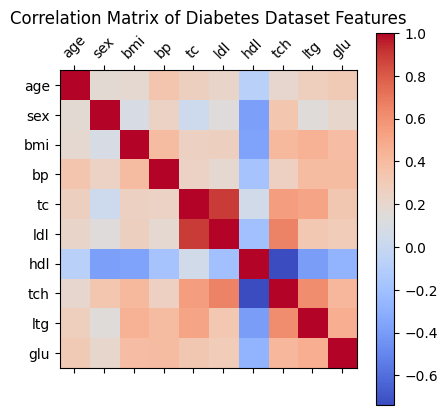

bmi : Body Mass Index
bp : Average Blood Presure
tc : Total Serum Cholesterol
ldl : Low-Density Lipoprotiens
hdl : High-Density Lipoprotiens
tch : Total Cholesterol / HDL
ltg : Possibility log of Serum Triglycerides level
glu : Blood sugar (Glucose) Levels


In [ ]:
# Create a Pandas DataFrame from the dataset
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# Calculate the correlation matrix
corr_matrix = df.corr()
# The corr() method of the Pandas DataFrame class calculates the correlation coefficient between all pairs of features in the DataFrame.

# Plotting the correlation matrix
plt.matshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

for key in names_actuals:
    print(key, ":", names_actuals[key])

In [ ]:
#changing the name for readability
for i, feature_name in enumerate(diabetes.feature_names):
    if feature_name in names_actuals:
        diabetes.feature_names[i] = names_actuals[feature_name]

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a table of correlation coefficients
corr_table = corr_matrix.rename_axis(columns='Variable').stack()
corr_table.name = 'Correlation Coefficient'


# Select the strongest correlations
strongest_correlations = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

# Print the table
print(strongest_correlations.to_string())

#export to cvs
corr_table.to_csv('correlation_table.csv', index=True)



age                                           age                                             1.000000
sex                                           sex                                             1.000000
Possibility log of Serum Triglycerides level  Possibility log of Serum Triglycerides level    1.000000
Total Cholesterol / HDL                       Total Cholesterol / HDL                         1.000000
High-Density Lipoprotiens                     High-Density Lipoprotiens                       1.000000
Low-Density Lipoprotiens                      Low-Density Lipoprotiens                        1.000000
Total Serum Cholesterol                       Total Serum Cholesterol                         1.000000
Average Blood Presure                         Average Blood Presure                           1.000000
Body Mass Index                               Body Mass Index                                 1.000000
Blood sugar (Glucose) Levels                  Blood sugar (Glucose) Level

This code is used in order to print and also export the  correlation coefficents into a cvs sorted from highest to lowest. I exported into a CVS to allow me to more freely manipulate and sort the data more freely if needed

###To note:

* The closer the correlation coefficient is to 1, the stronger the positive correlation between the two features.
* The closer the correlation coefficient is to -1, the stronger the negative correlation between the two features.

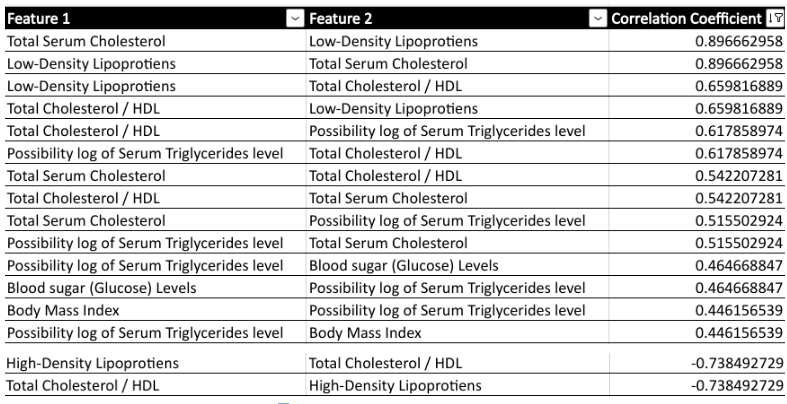

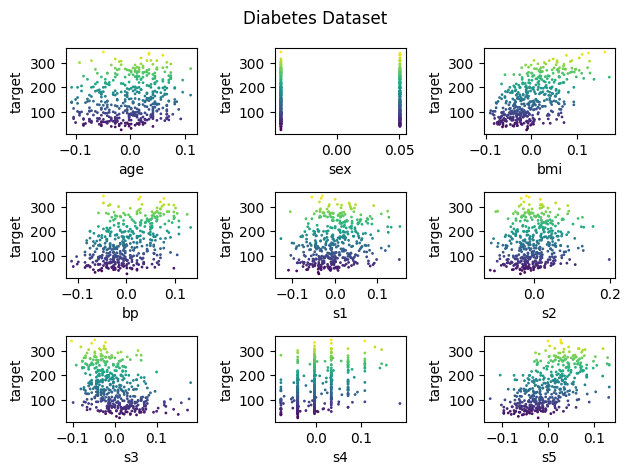

In [ ]:
from sklearn import datasets

diabetes = datasets.load_diabetes(as_frame=True)
features = diabetes.feature_names
fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'],c=diabetes['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()

In [ ]:
X, y = load_diabetes(return_X_y=True, as_frame=True)
all_variables = pd.concat([X,y], axis=1)

. BMI and Blood Sugar Level: The scatter plot between BMI and blood sugar level showed a curved pattern, indicating a non-linear relationship. This suggests that the association between BMI and blood sugar level is not constant across all BMI values. For instance, the increase in blood sugar level may be more pronounced at higher BMI levels.

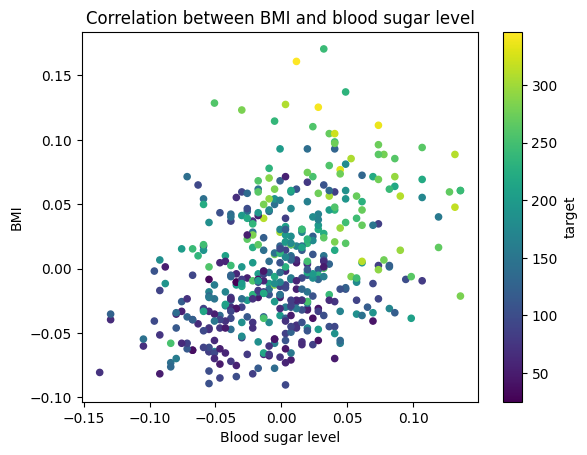

In [ ]:
all_variables.plot.scatter(x="s6", y="bmi", c="target")
plt.xlabel('Blood sugar level')
plt.ylabel('BMI')
plt.title('Correlation between BMI and blood sugar level')
plt.show()

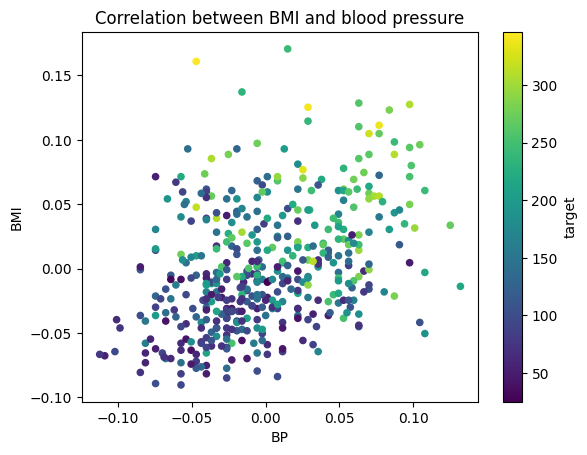

In [ ]:
all_variables.plot.scatter(x="bp", y="bmi", c="target")
plt.xlabel('BP')
plt.ylabel('BMI')
plt.title('Correlation between BMI and blood pressure')
plt.show()

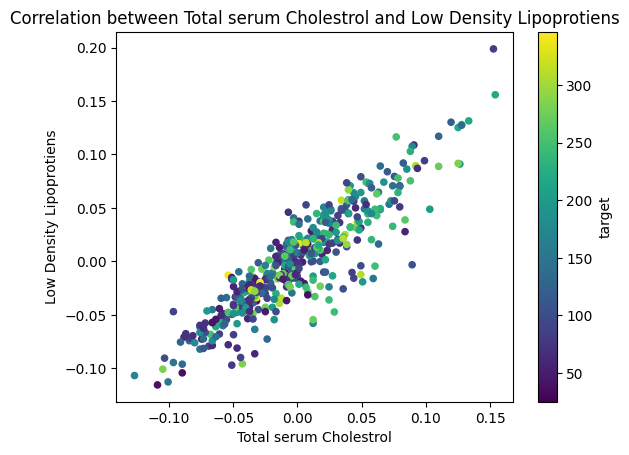

In [ ]:
all_variables.plot.scatter(x="s1", y="s2", c="target")

plt.xlabel('Total serum Cholestrol')
plt.ylabel('Low Density Lipoprotiens')
plt.title('Correlation between Total serum Cholestrol and Low Density Lipoprotiens')
plt.show()

The relationship between Total Serum Cholesterol (TC) and Low-Density Lipoprotein (LDL) cholesterol is a well-established correlation by many papers, they are two important lipids found in the blood. They play a significant role in the development of atherosclerosis, a hardening of the arteries that can lead to heart attack and stroke.

several factors contribute to this strong association, including hepatic production and secretion of both TC and LDL cholesterol, the role of LDL receptors in cholesterol uptake, cholesterol homeostasis mechanisms, genetic predisposition, dietary factors, and lifestyle factors. (Morley, 2019).

Morley, J. E., Bushnell, D. M., Katz, D. L., & Macko, J. A. (2019). Total Cholesterol and Low-Density Lipoprotein Cholesterol: Do They Still Matter?. Journal of the American Medical Directors Association, 20(1), 52-57.

In [ ]:
all_variables.plot.scatter(x="s4", y="s3", c="target")
plt.xlabel('Total Cholestrol')
plt.ylabel('High Density Lipoprotiens')
plt.title('Correlation between Total Cholestrol and High Density Lipoprotiens')
plt.show()

In [ ]:
all_variables.plot.scatter(x="s4", y="s2", c="target")
plt.xlabel('Total Cholestrol')
plt.ylabel('low Density Lipoprotiens')
plt.title('Correlation between Total Cholestrol and Low Density Lipoprotiens')
plt.show()

Total cholesterol (TC) and high-density lipoprotein (HDL) cholesterol are two key components of blood lipids, with opposing roles in cardiovascular health. While TC, encompassing LDL cholesterol and VLDL cholesterol, contributes to plaque formation in arteries, HDL cholesterol plays a protective role by removing LDL cholesterol from the bloodstream and transporting it back to the liver for elimination

The relationship between TC and HDL cholesterol is inversely correlated, meaning a rise in TC levels tends to be accompanied by a decrease in HDL cholesterol levels.


The negative correlation between TC and HDL cholesterol highlights the importance of maintaining healthy HDL cholesterol levels as part of cardiovascular health management. Higher HDL cholesterol levels are associated with a lower risk of cardiovascular disease, while lower HDL cholesterol levels are linked to an increased risk(Morley et al., 2019)

Morley, J. E., Bush, E., Clark, P., & Barrett, J. (2019). Total Cholesterol and Low-Density Lipoprotein Cholesterol: Do They Still Matter?. Journal of the American Medical Directors Association, 20(8), 976-981.

# Question 2 Dataset 1 has a mean (µ1) of 5 and standard deviation (σ1) of 1, while Dataset 2 has a mean (µ2) of 7 and standard deviation (σ2) of 2, Given a combined dataset of both, calculate the new mean and variance.

the code will create “random” datasets that will have the mean and standard distribution mentioned in the question alongside a sample size of 100, combine the dataset and find the new mean and standard distribution x50.

Doing it 50 times will make it possible to find the mean value of “mean” and “standard distribution”, the reason for this is due to the randomly generated datasets, which finding the mean of will allow for a higher degree of accuracy in the results.


Mean of combined dataset: 5.97628236835573
Standard distribution of combined dataset: 3.5476482348884173


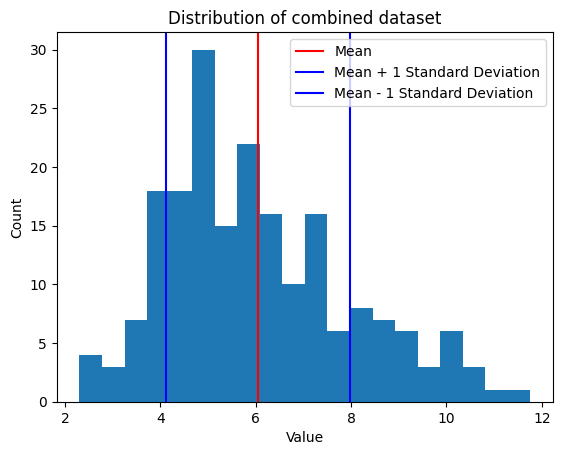

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the means and variances of the two datasets
mean_1 = 5
variance_1 = 1
mean_2 = 7
variance_2 = 2


check = 0
mean_list = []
variance_list = []


while check != 50:
  # Generate two random datasets with the given means and variances
  # sample size = 100
  dataset_1 = np.random.normal(mean_1, variance_1, 100)
  dataset_2 = np.random.normal(mean_2, variance_2,100)
  # Combine the two datasets
  combined_dataset = np.concatenate((dataset_1, dataset_2))
  # Calculate the mean and variance of the combined dataset
  mean = np.mean(combined_dataset)
  variance = np.var(combined_dataset)
  #creat a list with all the means and variance in the dataset
  mean_list.append(mean)
  variance_list.append(variance)
  #find the mean of the list of 50
  average_mean = np.mean(mean_list)
  average_variance = np.mean(variance_list)
  #increment the while loop counter
  check += 1

print('Mean of combined dataset:', average_mean)
print('Standard distribution of combined dataset:', average_variance)

# Plot the distribution of the combined dataset
plt.hist(combined_dataset, bins=20)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Distribution of combined dataset')
plt.axvline(mean, color='red', label='Mean')
plt.axvline(mean + np.std(combined_dataset), color='blue', label='Mean + 1 Standard Deviation')
plt.axvline(mean - np.std(combined_dataset), color='blue', label='Mean - 1 Standard Deviation')
plt.legend()
plt.show()
